In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam ,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D , MaxPooling2D , BatchNormalization

import tensorflow as tf
import random as rd

import cv2
import os
from tqdm import tqdm
from random import shuffle

In [2]:
DIR = r'flowersdata\flowers'

X = []
Y = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = r'flowersdata\flowers\daisy'
FLOWER_SUNFLOWER_DIR = r'flowersdata\flowers\sunflower'
FLOWER_TULIP_DIR = r'flowersdata\flowers\tulip'
FLOWER_DANDELION_DIR = r'flowersdata\flowers\dandelion'
FLOWER_ROSE_DIR = r'flowersdata\flowers\rose'

In [4]:
def assign_label(img , flower_type):
    return flower_type

def make_train_data(flower_type , DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img , flower_type)
        path = os.path.join(DIR , img)
        img = cv2.imread(path , cv2.IMREAD_COLOR)
        img = cv2.resize(img , (IMG_SIZE , IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data('daisy' , FLOWER_DAISY_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:07<00:00, 99.96it/s]

764


In [6]:
make_train_data('Sunflower' , FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 733/733 [00:08<00:00, 82.48it/s]

1497


In [7]:
make_train_data('Tulip' , FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:09<00:00, 101.38it/s]

2481


In [8]:
make_train_data('Dandelion' , FLOWER_DANDELION_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1052/1052 [00:09<00:00, 106.94it/s]

3533


In [9]:
make_train_data('Rose' , FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:07<00:00, 100.68it/s]

4317


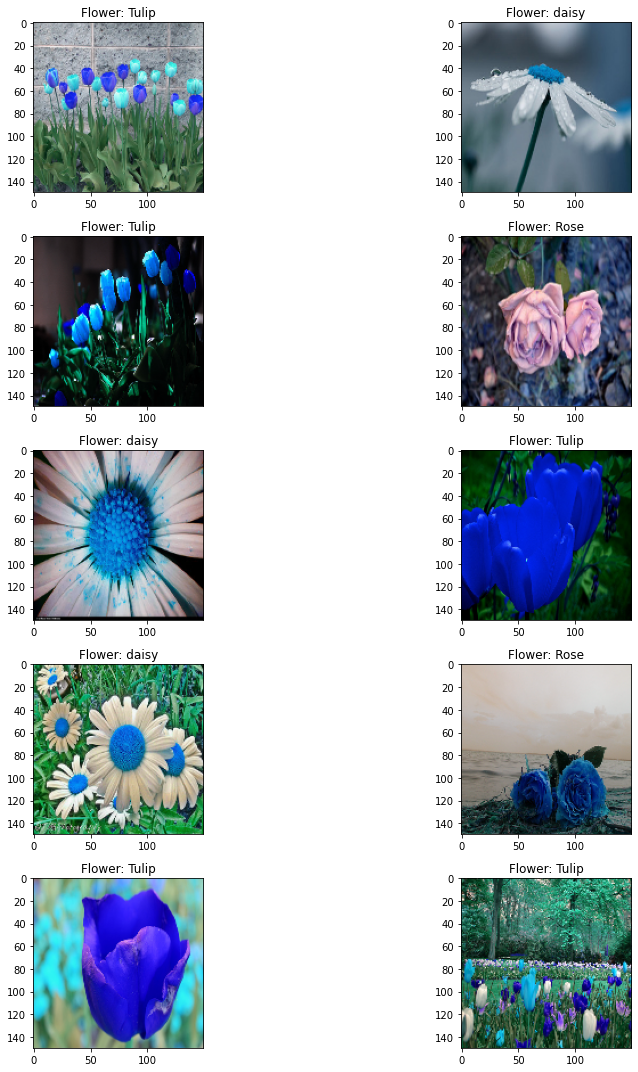

In [14]:
fig , ax = plt.subplots(5,2)
fig.set_size_inches(15,15)

for i in range(5):
    for j in range(2):
        l = rd.randint(0 , len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [19]:
lb = LabelEncoder()
Y = lb.fit_transform(Z)
Y = to_categorical(Y , 5)
X = np.array(X)
X= X/255

In [20]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(X ,Y , test_size = 0.25 , random_state = 42)

In [21]:
tf.random.set_seed(42)

In [23]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(5,5),padding = 'Same',activation='relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,kernel_size=(3,3),padding = 'Same',activation='relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Conv2D(filters = 96,kernel_size=(3,3),padding = 'Same',activation='relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Conv2D(filters = 96,kernel_size=(3,3),padding = 'Same',activation='relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5,activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)       

In [25]:
batch_size = 128
epochs = 10

from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor= 'val_acc' , patience = 3 , verbose = 1 , factor = 0.1)

In [27]:
datagen = ImageDataGenerator(
          featurewise_center = False, # set input mean to 0 over the dataset
          samplewise_center = False, # set each sample mean to 0 over the dataset
          featurewise_std_normalization = False, # divide inputs by std of the dataset
          samplewise_std_normalization = False, # divide each sample by std of the dataset
          zca_whitening = False, # apply ZCA with whitening
          rotation_range = 10, # randomly rotate images in the range(degress , 0 to 100)
          zoom_range = 0.1, # randomly zoom image
          width_shift_range = 0.2, # randomly shift images horizontally (fraction of total width)
          height_shift_range = 0.2, # randomly shift images vertically (fraction of total height)
          horizontal_flip = True, # randomly flip images horizontally
          vertical_flip = True # randomly flip images vertically
)

In [28]:
model.compile(optimizer = Adam(lr = 0.001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

D:\Anaconda\envs\myenv\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [29]:
history = model.fit(datagen.flow(X_Train,Y_Train , batch_size = batch_size),
                   epochs = epochs , validation_data = (X_Test , Y_Test),
                   verbose = 1 , steps_per_epoch = X_Train.shape[0]//batch_size) # callback = red_lr

Epoch 1/10
25/25 [==============================] - 93s 1s/step - loss: 1.4249 - accuracy: 0.3808 - val_loss: 1.1698 - val_accuracy: 0.5148
Epoch 2/10
25/25 [==============================] - 25s 1s/step - loss: 1.1568 - accuracy: 0.5088 - val_loss: 1.0260 - val_accuracy: 0.5852
Epoch 3/10
25/25 [==============================] - 26s 1s/step - loss: 1.1283 - accuracy: 0.5320 - val_loss: 0.9798 - val_accuracy: 0.6111
Epoch 4/10
25/25 [==============================] - 25s 972ms/step - loss: 1.0213 - accuracy: 0.6021 - val_loss: 0.9658 - val_accuracy: 0.6213
Epoch 5/10
25/25 [==============================] - 25s 989ms/step - loss: 0.9884 - accuracy: 0.6121 - val_loss: 0.9430 - val_accuracy: 0.6278
Epoch 6/10
25/25 [==============================] - 27s 1s/step - loss: 0.9289 - accuracy: 0.6436 - val_loss: 0.8523 - val_accuracy: 0.6398
Epoch 7/10
25/25 [==============================] - 26s 1s/step - loss: 0.8867 - accuracy: 0.6571 - val_loss: 0.8298 - val_accuracy: 0.6657
Epoch 8/10
25/

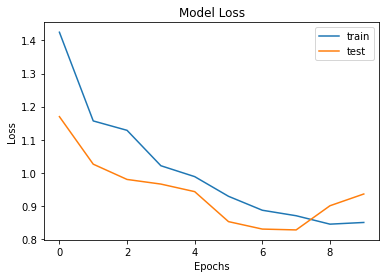

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train' , 'test'])
plt.show()